In [139]:
from importlib import reload 
import datakit
reload(datakit)
from datakit import *
import os
import warnings

pd.set_option('display.max_columns', None)
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
warnings.filterwarnings('ignore')

In [ ]:
subways_location = {
    'Plac Wilsona': {'Latitude': 52.26902, 'Longitude': 20.985},
    'Wilanowska': {'Latitude': 52.18098, 'Longitude': 21.02364},
    'Centrum': {'Latitude': 52.23055, 'Longitude': 21.01091},
    'Stokłosy': {'Latitude': 52.15583, 'Longitude': 21.0347},
    'Wierzbno': {'Latitude': 52.18932, 'Longitude': 21.01726},
    'Pole Mokotowskie': {'Latitude': 52.2079, 'Longitude': 21.00837},
    'Swiętokrzyska': {'Latitude': 52.23499, 'Longitude': 21.00835},
    'Ratusz': {'Latitude': 52.24476, 'Longitude': 21.00082},
    'Marymont': {'Latitude': 52.27178, 'Longitude': 20.97232},
    'Imielin': {'Latitude': 52.14952, 'Longitude': 21.04543},
    'Kabaty': {'Latitude': 52.13109, 'Longitude': 21.06604},
    'Ursynów': {'Latitude': 52.16217, 'Longitude': 21.02858},
    'Natolin': {'Latitude': 52.14033, 'Longitude': 21.05776},
    'Bemowo': {'Latitude': 52.2393879, 'Longitude': 20.9175868},
    'Ulrychów': {'Latitude': 52.2402211, 'Longitude': 20.9286984},
    'Księcia Janusza': {'Latitude': 52.238989, 'Longitude': 20.9413589},
    'Młynów': {'Latitude': 52.2370368, 'Longitude': 20.9582514},
    'Płocka': {'Latitude': 52.2331322, 'Longitude': 20.9672229},
    'Rondo Daszyńskiego': {'Latitude': 52.2302503, 'Longitude': 20.9812049},
    'Rondo ONZ': {'Latitude': 52.2326673, 'Longitude': 20.9943419},
    'Nowy Świat Uniwersytet': {'Latitude': 52.2372522, 'Longitude': 21.0163951},
    'Centrum Nauki Kopernik': {'Latitude': 52.2405898, 'Longitude': 21.029495},
    'Stadion Narodowy': {'Latitude': 52.2468026, 'Longitude': 21.0437104},
    'Wileński': {'Latitude': 52.2552165, 'Longitude': 21.0373375},
    'Szwedzka': {'Latitude': 52.2658294, 'Longitude': 21.0477777},
    'Targówek+Mieszkaniowy': {'Latitude': 52.278611, 'Longitude': 21.0478345},
    'Zacisze': {'Latitude': 52.278611, 'Longitude': 21.0478345},
    'Kondratowicza': {'Latitude': 52.2844033, 'Longitude': 21.0489269},
    'Bródno': {'Latitude': 52.2844033, 'Longitude': 21.0489269}}

In [ ]:
df = concat_csv_files()

In [ ]:
df.shape[0]

In [ ]:
df = remove_duplicates(df)

In [ ]:
df.shape[0]

In [ ]:
%%time
df = scrub_data(df)

In [ ]:
df[['rent_price','latitude','longitude']].to_csv('location_plot_test.csv', index = False)

In [3]:
df = pd.read_csv('location_plot_test.csv')

In [93]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

def plot_heat_map_district(df):
    
    os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
    
    recording_units = gpd.read_file('geographic_data/recording_units_poland/jednostki_ewidencyjne.shp')

    warsaw_districts = ['Bemowo', 'Białołęka', 'Bielany', 'MOKOTÓW',
                        'OCHOTA', 'PRAGA POŁUDNIE', 'Praga-Północ',
                        'REMBERTÓW', 'ŚRÓDMIEŚCIE', 'TARGÓWEK', 'URSUS',
                        'URSYNÓW', 'WAWER', 'WESOŁA', 'WILANÓW',
                        'WŁOCHY', 'WOLA', 'Żoliborz']

    districts = recording_units[recording_units.JPT_NAZWA_.isin(warsaw_districts)]
    
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")
    gdf = gdf.to_crs(districts.crs)
    districts_with_counts = gpd.sjoin(gdf, districts, how="left", op="within")
    
    # Count the number of flats in each district
    flat_counts = districts_with_counts.groupby('index_right').size()

    # Add the counts to the districts GeoDataFrame
    districts['flat_count'] = flat_counts
    districts['flat_count'] = districts['flat_count'].fillna(0)

    # Convert the districts GeoDataFrame to EPSG:3857 for basemap compatibility
    districts = districts.to_crs(epsg=3857)
    
    # Count the number of flats in each district
    flat_counts = districts_with_counts.groupby('index_right').size()

    # Add the counts to the districts GeoDataFrame
    districts['flat_count'] = flat_counts
    districts['flat_count'] = districts['flat_count'].fillna(0)

    # Convert the districts GeoDataFrame to EPSG:3857 for basemap compatibility
    districts = districts.to_crs(epsg=3857)

    # Reduce the figure size
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # Plot the heat map with transparency
    districts.plot(column='flat_count', ax=ax, cmap='Reds', linewidth=1, edgecolor='black', legend=True, alpha=0.6)

    # Add district names
    for idx, row in districts.iterrows():
        plt.annotate(text=row['JPT_NAZWA_'].upper(), xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     ha='center', fontsize=6, color='black', weight='bold')


    # Add titles and labels
    plt.title('Heat Map of Flats Count by District in Warsaw', fontsize=12, weight='bold')

    # Remove axes for a cleaner look
    ax.set_axis_off()

    # Show the plot
    plt.show()

C:\Users\kacpe\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\kacpe\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


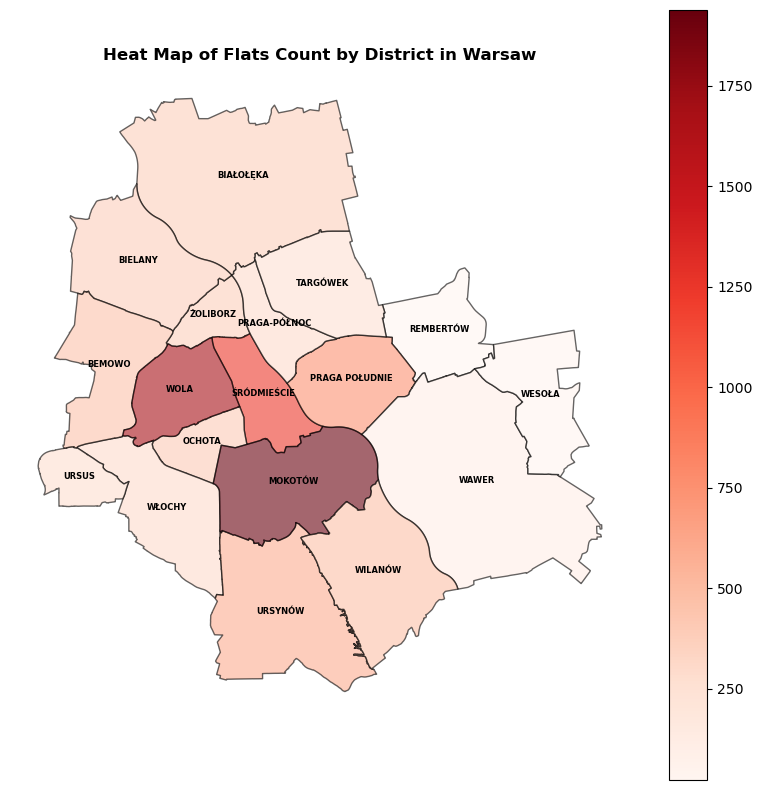

In [95]:
plot_heat_map_district(df)

In [97]:
def plot_heat_map_district(
    df: pd.DataFrame,
    plot_type: str = 'count',
    recording_units_pth: str = 'geographic_data/recording_units_poland/jednostki_ewidencyjne.shp'):
    
    recording_units = gpd.read_file(recording_units_pth)

    warsaw_districts = ['Bemowo', 'Białołęka', 'Bielany', 'MOKOTÓW',
                        'OCHOTA', 'PRAGA POŁUDNIE', 'Praga-Północ',
                        'REMBERTÓW', 'ŚRÓDMIEŚCIE', 'TARGÓWEK', 'URSUS',
                        'URSYNÓW', 'WAWER', 'WESOŁA', 'WILANÓW',
                        'WŁOCHY', 'WOLA', 'Żoliborz']

    districts = recording_units[recording_units.JPT_NAZWA_.isin(warsaw_districts)]
    
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")
    gdf = gdf.to_crs(districts.crs)
    districts_with_counts = gpd.sjoin(gdf, districts, how="left", op="within")

    if plot_type == 'count':
        # Count the number of flats in each district
        flat_counts = districts_with_counts.groupby('index_right').size()
        districts['flat_count'] = flat_counts
        districts['flat_count'] = districts['flat_count'].fillna(0)
        column_to_plot = 'flat_count'
        title = 'Heat Map of Flats Count by District in Warsaw'
        cmap = 'Reds'
    elif plot_type == 'median_rent':
        # Calculate the median rent price in each district
        median_rent_prices = districts_with_counts.groupby('index_right')['rent_price'].median()
        districts['median_rent_price'] = median_rent_prices
        districts['median_rent_price'] = districts['median_rent_price'].fillna(0)
        column_to_plot = 'median_rent_price'
        title = 'Heat Map of Median Rent Price by District in Warsaw'
        cmap = 'Greens'
    else:
        raise ValueError("plot_type must be either 'count' or 'median_rent'")
    
    # Convert the districts GeoDataFrame
    districts = districts.to_crs(epsg=3857)

    # Initialize Figure
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # Plot the heat map
    districts.plot(column=column_to_plot, ax=ax, cmap=cmap, linewidth=1, edgecolor='black', legend=True, alpha=0.6)

    # Add district names
    for idx, row in districts.iterrows():
        plt.annotate(text=row['JPT_NAZWA_'].upper(), xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     ha='center', fontsize=6, color='black', weight='bold')

    plt.title(title, fontsize=12, weight='bold')
    ax.set_axis_off()
    plt.show()
    
    return None

C:\Users\kacpe\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3526: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\kacpe\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


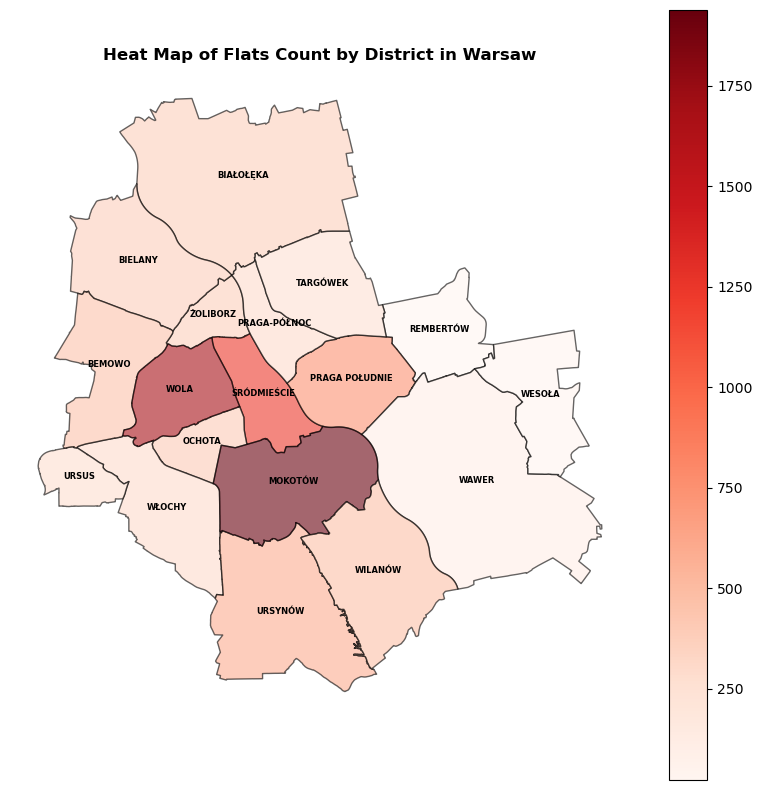

In [99]:
plot_heat_map_district(df)

In [221]:
def plot_heat_map_grid_cells(df, plot_type='count'):
    
    warsaw = gpd.read_file('geographic_data/commons_poland/Gminy.shp')
    warsaw = warsaw[warsaw.JPT_NAZWA_.eq('Warszawa')]
    
    # Load the shapefile with grid cells
    grid_cells = gpd.read_file('geographic_data/GRID_NSP2021_RES/GRID_NSP2021_RES.shp')
    grid_cells = grid_cells.to_crs('EPSG:4258')
    
    # Perform spatial join to keep only grid cells within Warsaw boundaries
    grid_cells_within_warsaw = grid_cells.overlay(warsaw)
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")
    gdf = gdf.to_crs(grid_cells_within_warsaw.crs)

    # Perform spatial join to count flats or calculate median rent in each grid cell
    grid_cells_with_counts = gpd.sjoin(gdf, grid_cells_within_warsaw, how="left", op="within")

    if plot_type == 'count':
        # Count the number of flats in each grid cell
        flat_counts = grid_cells_with_counts.groupby('index_right').size()
        grid_cells_within_warsaw['flat_count'] = flat_counts
        grid_cells_within_warsaw['flat_count'] = grid_cells_within_warsaw['flat_count'].fillna(0)
        column_to_plot = 'flat_count'
        title = 'Heat Map of Flats Count by Grid Cells in Warsaw'
        cmap = 'Reds'
    elif plot_type == 'median_rent':
        # Calculate the median rent price in each grid cell
        median_rent_prices = grid_cells_with_counts.groupby('index_right')['rent_price'].median()
        grid_cells_within_warsaw['median_rent_price'] = median_rent_prices
        grid_cells_within_warsaw['median_rent_price'] = grid_cells_within_warsaw['median_rent_price'].fillna(0)
        column_to_plot = 'median_rent_price'
        title = 'Heat Map of Median Rent Price by Grid Cells in Warsaw'
        cmap = 'Greens'
    else:
        raise ValueError("plot_type must be either 'count' or 'median_rent'")
    
    # Convert the grid cells GeoDataFrame to EPSG:3857 for basemap compatibility
    grid_cells_within_warsaw = grid_cells_within_warsaw.to_crs(epsg=3857)

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    grid_cells_within_warsaw.plot(column=column_to_plot, ax=ax, cmap=cmap, linewidth=0.5, edgecolor='black', legend=True, alpha=0.6)

    # Add basemap (choose one of the basemap options)
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

    # Add titles and labels
    plt.title(title, fontsize=12, weight='bold')

    # Remove axes for a cleaner look
    ax.set_axis_off()

    # Show the plot
    plt.show()
    
    return None

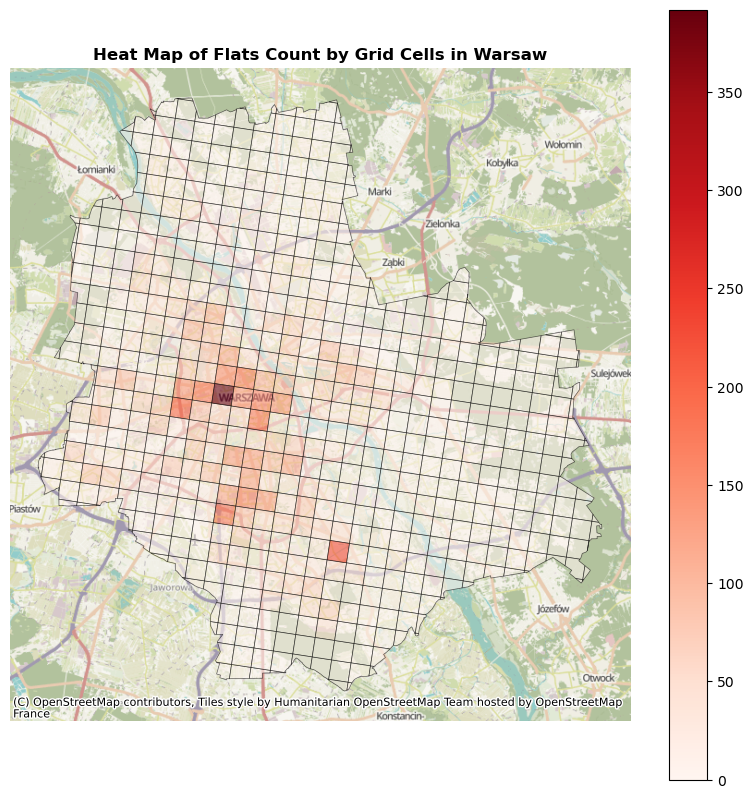

In [223]:
plot_heat_map_grid_cells(df)